In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_colwidth', None)

In [2]:
data_path = '../../data/data_generation_from_gpt/final_chat_gpt_data.txt'

# Read the data
with open(data_path, 'r') as file:
    lines = file.readlines()

# Initialize lists for structured data
speakers = []
messages = []

# Process each line
for line in lines:
    if line.strip():  # Ignore empty lines
        if line.startswith("<bot>"):
            speakers.append("bot")
            # Remove <bot> and <endOfText> tags
            messages.append(line.replace("<bot>", "").replace("<endOfText>", "").strip())
        elif line.startswith("<human>"):
            speakers.append("human")
            # Remove <human> and <endOfText> tags
            messages.append(line.replace("<human>", "").replace("<endOfText>", "").strip())

# Create a DataFrame
df = pd.DataFrame({'speaker': speakers, 'message': messages})

# Display the first few rows
print(df.head())

# Save to a CSV file
output_path = '/Users/sofiagermer/Desktop/SOFIA/IAS/WinterSemester_24_25/ml_proj/Project-ML/data/data_generation_from_gpt/final_chat_gpt_data.csv'
df.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")

  speaker  \
0     bot   
1   human   
2     bot   
3   human   
4     bot   

                                                                                                                                                                                              message  
0  I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.  
1                                                                                                                                         That sounds magical! Fireworks create a special atmosphere.  
2                                                                                                                                                                 This was a best friend. I miss her.  
3                                                                                                                        

                                             |          | [  0%]   00:00 -> (? left)


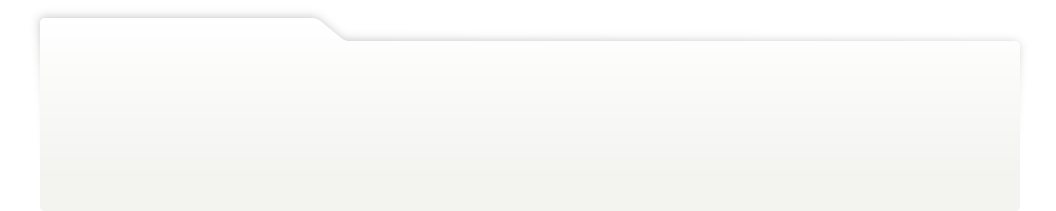
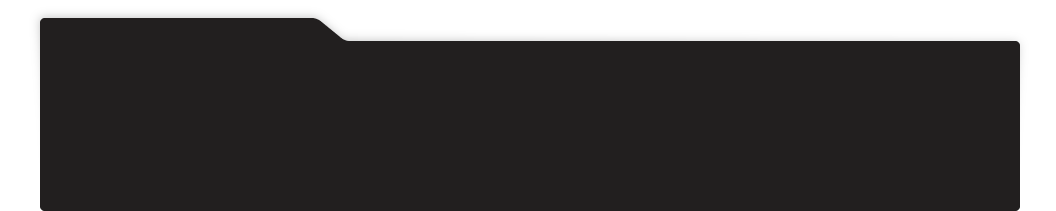
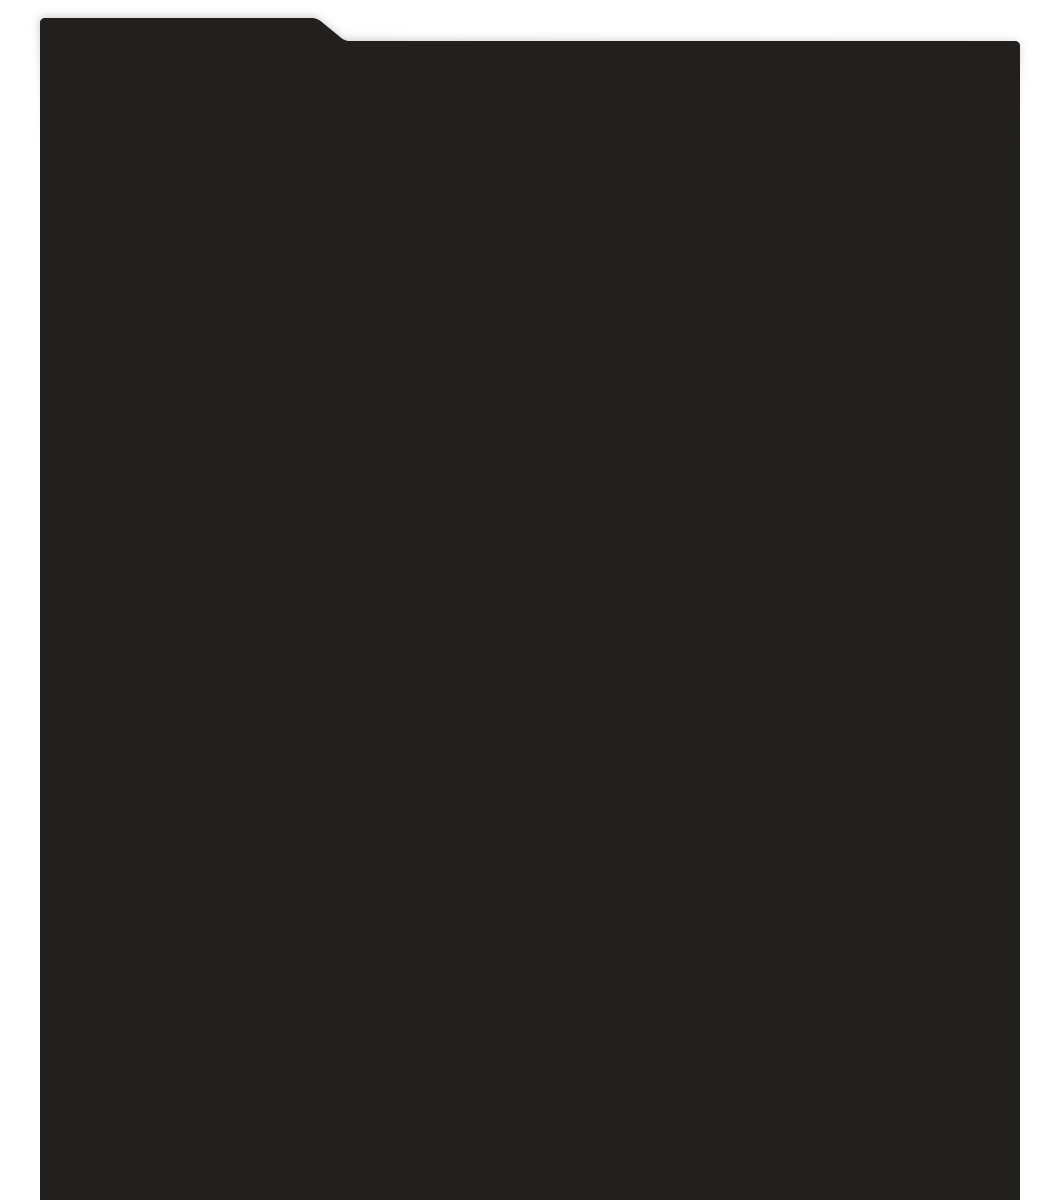
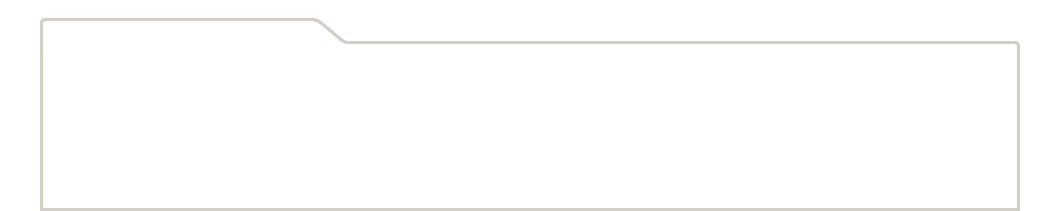
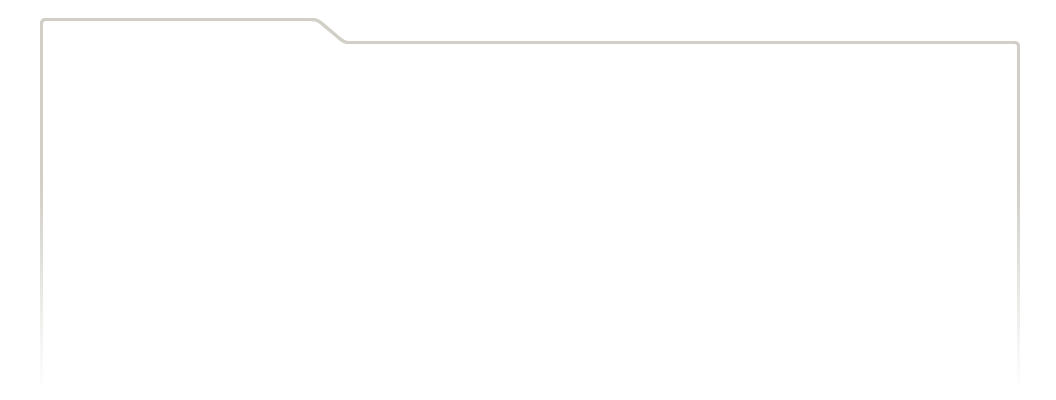
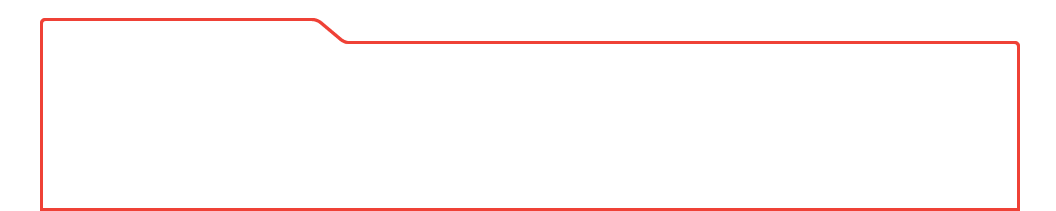
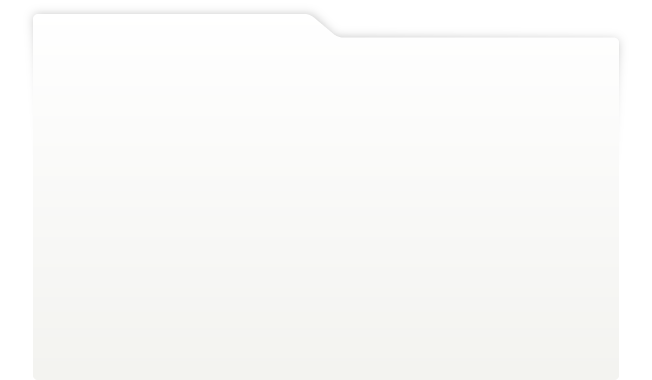
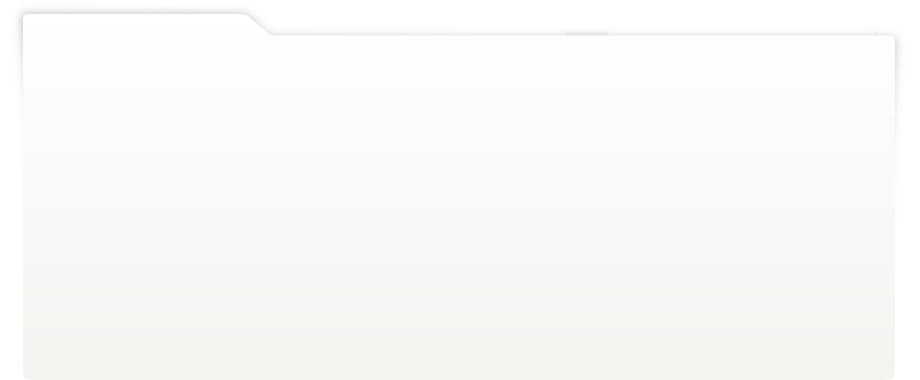
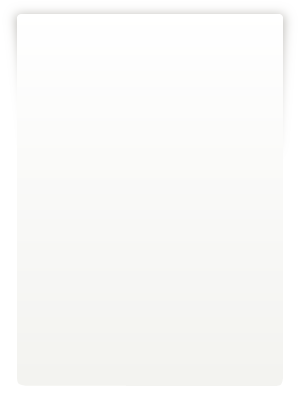
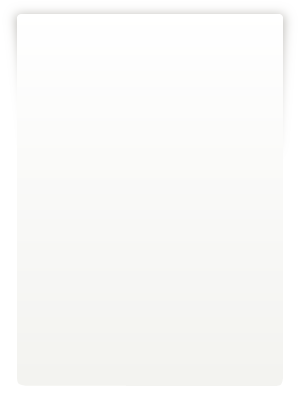
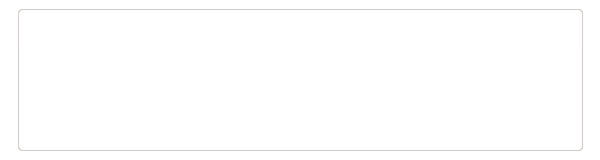
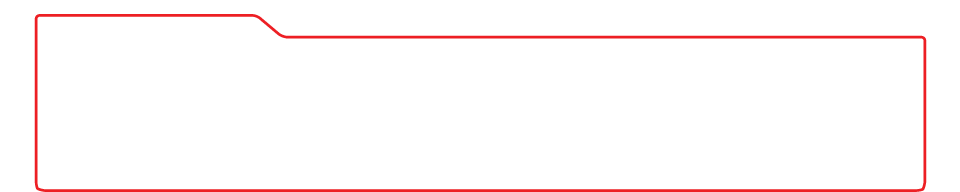
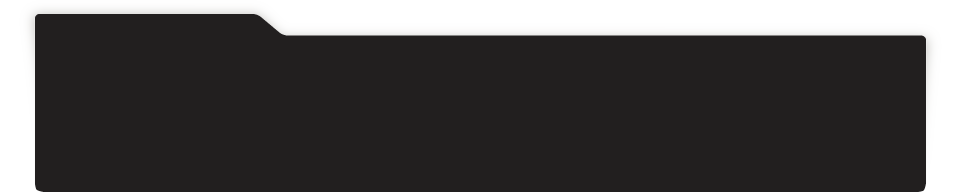
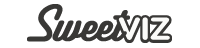
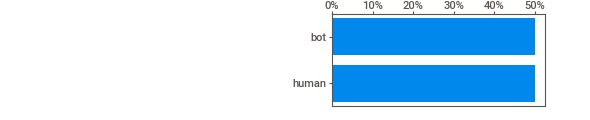
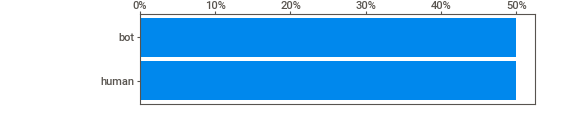
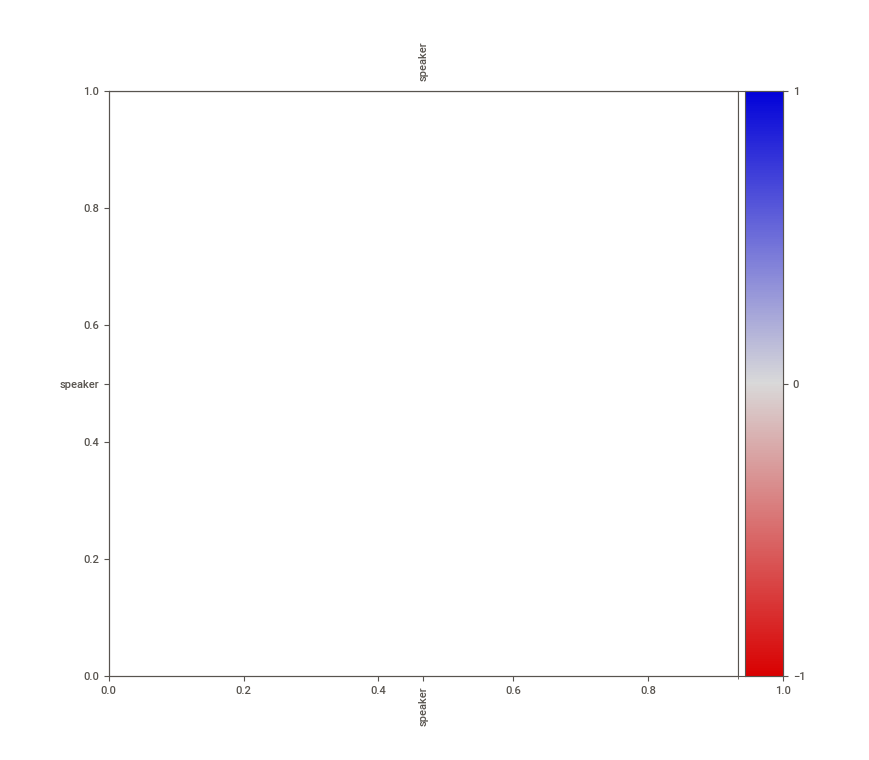
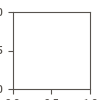

In [3]:
report = sv.analyze(df)
report.show_notebook()

## Visualization of length of the sentences

### Bot lines

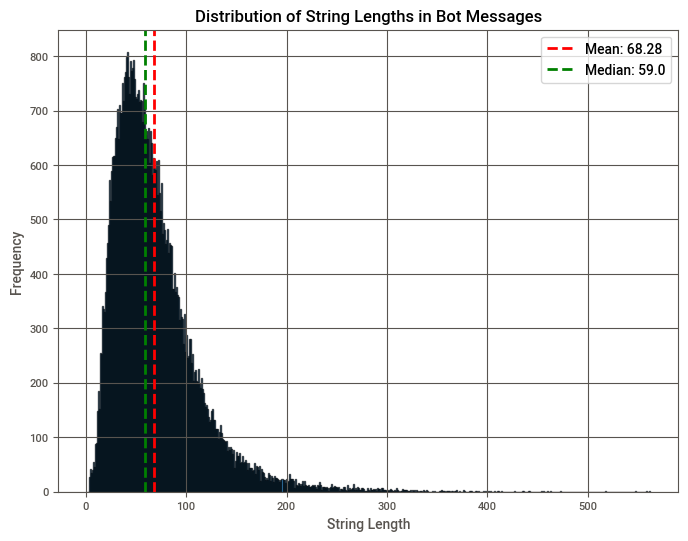

In [9]:
# Calculate the lengths of bot messages
df['len_bot'] = df.loc[df['speaker'] == 'bot', 'message'].str.len()

# Drop NaN values (non-bot rows)
bot_lengths = df['len_bot'].dropna()

# Calculate statistics
mean_length = bot_lengths.mean()
median_length = bot_lengths.median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(bot_lengths, bins=range(1, int(bot_lengths.max()) + 2), edgecolor='black', alpha=0.7)

# Add mean and median lines
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

# Add titles and labels
plt.title("Distribution of String Lengths in Bot Messages")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

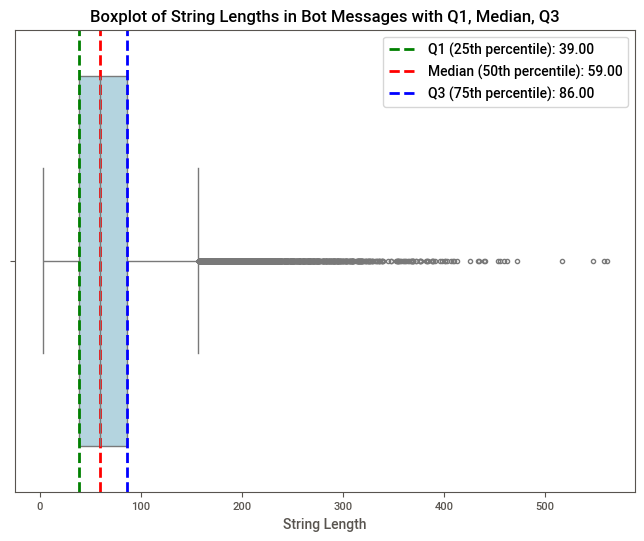

In [10]:

# Calculate the lengths of bot messages
df['len_bot'] = df.loc[df['speaker'] == 'bot', 'message'].str.len()

# Drop NaN values (non-bot rows)
bot_lengths = df['len_bot'].dropna()

# Calculate quartiles
Q1 = bot_lengths.quantile(0.25)
Q2 = bot_lengths.quantile(0.50)  # Median
Q3 = bot_lengths.quantile(0.75)

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=bot_lengths, color='lightblue')

# Add vertical lines for Q1, Median (Q2), and Q3
plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

# Add titles and labels
plt.title("Boxplot of String Lengths in Bot Messages with Q1, Median, Q3")
plt.xlabel("String Length")

# Add legend
plt.legend()

# Show the plot
plt.show()

## Human Lines

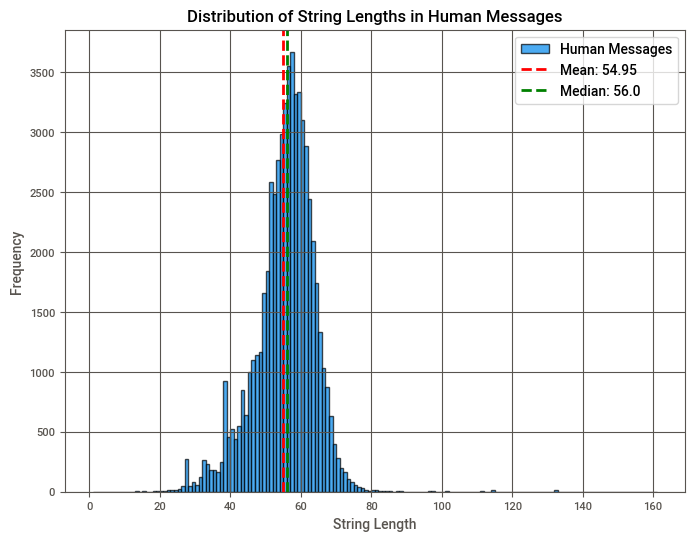

In [11]:
# Calculate the lengths of human messages
df['len_human'] = df.loc[df['speaker'] == 'human', 'message'].str.len()

# Drop NaN values (non-human rows)
human_lengths = df['len_human'].dropna()

# Calculate statistics for human messages
human_mean_length = human_lengths.mean()
human_median_length = human_lengths.median()

# Plot the histogram for human messages
plt.figure(figsize=(8, 6))
plt.hist(human_lengths, bins=range(1, int(human_lengths.max()) + 2), edgecolor='black', alpha=0.7, label='Human Messages')

# Add mean and median lines
plt.axvline(human_mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {human_mean_length:.2f}')
plt.axvline(human_median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {human_median_length}')

# Add titles and labels
plt.title("Distribution of String Lengths in Human Messages")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

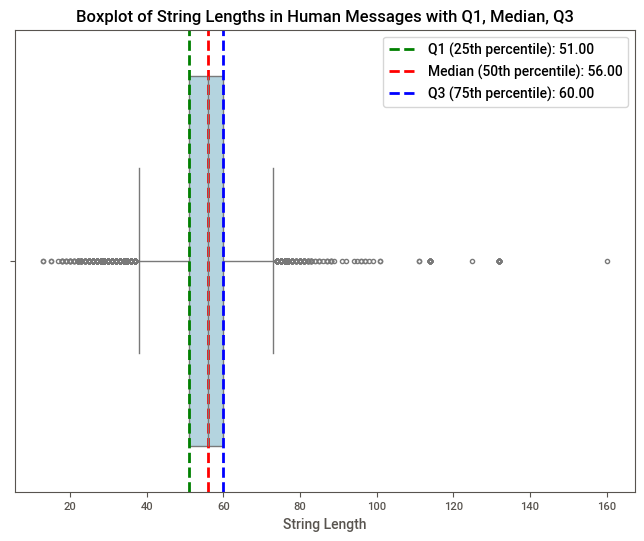

In [12]:
# Calculate the lengths of human messages
df['len_human'] = df.loc[df['speaker'] == 'human', 'message'].str.len()

# Drop NaN values (non-human rows)
human_lengths = df['len_human'].dropna()

# Calculate quartiles
Q1 = human_lengths.quantile(0.25)
Q2 = human_lengths.quantile(0.50)  # Median
Q3 = human_lengths.quantile(0.75)

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=human_lengths, color='lightblue')

# Add vertical lines for Q1, Median (Q2), and Q3
plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

# Add titles and labels
plt.title("Boxplot of String Lengths in Human Messages with Q1, Median, Q3")
plt.xlabel("String Length")

# Add legend
plt.legend()

# Show the plot
plt.show()

## Vocabulary Analysis

### Vocabulary Size

In [8]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['message'])  # X is a sparse matrix of word counts

word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_frequencies = word_counts.sum(axis=0)
top_words = word_frequencies.sort_values(ascending=False).head(10)

# Print vocabulary size and top 10 words
vocab_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocab_size}")
print("\nTop 10 most frequent words:")
print(top_words)

Vocabulary size: 18438

Top 10 most frequent words:
to      50453
it      44435
you     39726
that    39556
the     25385
and     22643
my      17901
was     15102
is      14621
for     14401
dtype: int64


## Sentence Analysis

### Latent Dirichlet Allocation (LDA)
Method for discovering the hidden (latent) topics present in a collection of documents.

In [14]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [15]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiagermer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiagermer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sofiagermer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower() 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

def preprocess(text):
    return text.split()

In [18]:
# Apply preprocess_text to the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Separate cleaned messages for bot and human speakers
df['cleaned_human_message'] = df.apply(lambda row: row['cleaned_message'] if row['speaker'] == 'human' else None, axis=1)
df['cleaned_bot_message'] = df.apply(lambda row: row['cleaned_message'] if row['speaker'] == 'bot' else None, axis=1)

# Display the first few rows of the DataFrame
print(df.head())

  speaker  \
0     bot   
1   human   
2     bot   
3   human   
4     bot   

                                                                                                                                                                                              message  \
0  I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.   
1                                                                                                                                         That sounds magical! Fireworks create a special atmosphere.   
2                                                                                                                                                                 This was a best friend. I miss her.   
3                                                                                                                    

In [19]:
# human -> question
human = df['cleaned_human_message'].astype(str)

# bot -> answer
bot = df['cleaned_bot_message'].astype(str)

In [21]:
processed_h = human.apply(preprocess)
processed_b = bot.apply(preprocess)

In [24]:
dictionary_h = corpora.Dictionary(processed_h)
dictionary_b = corpora.Dictionary(processed_b)

corpus_h = [dictionary_h.doc2bow(doc) for doc in processed_h]
corpus_b = [dictionary_b.doc2bow(doc) for doc in processed_b]

In [26]:
lda_model_h = LdaModel(corpus=corpus_h, id2word=dictionary_h, num_topics=5, passes=10, random_state=42)

print("Human Topics:")
for idx, topic in lda_model_h.print_topics(-1):
    print(f"Topic {idx}: {topic}")

lda_model_b = LdaModel(corpus=corpus_b, id2word=dictionary_b, num_topics=5, passes=10, random_state=42)

print("\nBot Topics:")
for idx, topic in lda_model_b.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Human Topics:
Topic 0: 0.040*"great" + 0.038*"stay" + 0.025*"thats" + 0.024*"yes" + 0.016*"positive" + 0.016*"hope" + 0.016*"good" + 0.013*"keep" + 0.012*"absolutely" + 0.012*"love"
Topic 1: 0.088*"im" + 0.055*"hear" + 0.048*"tough" + 0.046*"sounds" + 0.044*"sorry" + 0.030*"help" + 0.025*"frustrating" + 0.024*"really" + 0.018*"understand" + 0.018*"thank"
Topic 2: 0.908*"None" + 0.005*"happens" + 0.003*"cats" + 0.003*"hold" + 0.002*"hes" + 0.002*"comforting" + 0.002*"theyre" + 0.002*"explore" + 0.002*"money" + 0.002*"encouragement"
Topic 3: 0.079*"feel" + 0.034*"way" + 0.033*"okay" + 0.032*"im" + 0.027*"help" + 0.023*"whats" + 0.022*"tough" + 0.021*"understandable" + 0.018*"trust" + 0.016*"natural"
Topic 4: 0.070*"sounds" + 0.061*"thats" + 0.042*"wonderful" + 0.033*"great" + 0.032*"enjoy" + 0.026*"like" + 0.020*"exciting" + 0.017*"hear" + 0.016*"could" + 0.014*"memories"

Bot Topics:
Topic 0: 0.041*"good" + 0.038*"oh" + 0.038*"thats" + 0.021*"hope" + 0.020*"im" + 0.019*"like" + 0.018*"r

#### Interpret The Topics
+ Topics don’t necessarily represent fixed categories but rather recurring patterns in the dataset.

**Human Topics**

Topic 0
- Top words: “great”, “stay”, “thats”, “yes”, “positive”, “hope”, “good”, “keep”, “absolutely”, “love”.
- Possible Theme: Encouragement and positivity.
- This topic focuses on maintaining optimism and perseverance, with words like “positive”, “hope”, “keep”, and “love”.
- It likely reflects conversations that encourage others or express enthusiasm.

Topic 1
- Top words: “im”, “hear”, “tough”, “sounds”, “sorry”, “help”, “frustrating”, “really”, “understand”, “thank”.
- Possible Theme: Empathy and support.
- The use of “sorry”, “tough”, and “help” indicates discussions centered around offering empathy or responding to challenges.
- This topic likely involves providing support and listening to difficulties.

Topic 2
- Top words: “None”, “happens”, “cats”, “hold”, “hes”, “comforting”, “theyre”, “explore”, “money”, “encouragement”.
- Possible Theme: Miscellaneous or incomplete interactions.
- The heavy prevalence of “None” suggests gaps in meaningful content, potentially placeholder or sparse data.
- Other terms like “happens” and “explore” hint at exploratory or random discussions.

Topic 3
- Top words: “feel”, “way”, “okay”, “im”, “help”, “whats”, “tough”, “understandable”, “trust”, “natural”.
- Possible Theme: Emotional introspection and advice.
- Words like “feel”, “okay”, and “tough” suggest reflections on emotional states.
- This topic captures conversations where people seek understanding or advice about personal feelings.

Topic 4
- Top words: “sounds”, “thats”, “wonderful”, “great”, “enjoy”, “like”, “exciting”, “hear”, “could”, “memories”.
- Possible Theme: Celebratory or nostalgic discussions.
- The emphasis on “wonderful”, “enjoy”, and “memories” suggests appreciation of past experiences or excitement about future events.
- Likely reflects conversations sharing joyful moments.

**Bot Topics**

Topic 0
- Top words: “good”, “oh”, “thats”, “hope”, “im”, “like”, “really”, “nice”, “great”, “feel”.
- Theme: Positive affirmations and reactions.
- The frequent use of “good”, “thats”, and “great” indicates affirming responses to events or statements.
- Words like “oh” and “hope” hint at a conversational tone that combines positivity with a touch of introspection.

Topic 1
- Top words: “dog”, “cant”, “found”, “car”, “got”, “looking”, “someone”, “care”, “ready”, “day”.
- Theme: Daily life and occurrences.
- Terms like “dog”, “car”, “found”, and “day” point to discussions involving everyday experiences.
- This topic might involve sharing stories or updates about mundane yet relatable events.

Topic 2
- Top words: “going”, “got”, “friend”, “went”, “one”, “last”, “time”, “day”, “work”, “week”.
- Theme: Social interactions and routines.
- Words like “friend”, “went”, “time”, and “week” suggest conversations about social events or daily routines.
- This topic reflects narratives of past or upcoming activities.

Topic 3
- Top words: “None”, “knew”, “2”, “date”, “dogs”, “later”, “run”, “living”, “season”, “tv”.
- Theme: Sparse or fragmented discussions.
- The dominance of “None” indicates that this topic might capture incomplete or non-informative interactions.
- The presence of words like “tv”, “dogs”, and “living” points to varied but lightweight themes.

Topic 4
- Top words: “really”, “im”, “like”, “dont”, “know”, “sure”, “get”, “would”, “people”, “make”.
- Theme: Opinions and uncertainty.
- With words like “dont”, “know”, and “sure”, this topic captures moments of speculation or conversational uncertainty
- “Really” and “like” add a layer of casual commentary.

In [27]:
lda_vis_h = gensimvis.prepare(lda_model_h, corpus_h, dictionary_h)
pyLDAvis.display(lda_vis_h)

/opt/anaconda3/envs/ml/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=73062) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/ml/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=73062) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/ml/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=73062) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/ml/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=73062) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/ml/lib/python3.12/site-packages/joblib/externals/loky/ba

**What is the λ?**

+ λ = 1.0: Topic-centric interpretation
  + When you want to find topic-specific words: Set lambda close to 1.0 to see the most unique words in each topic.
+ λ = 0.0: dataset-wide frequency-centred interpretation
  + When you want to see the impact of common words: Setting lambda close to 0.0 reveals the most frequent words in the dataset overall. This gives you a sense of the overall nature of your data.
+ λ = 0.5 (intermediate value): Balanced interpretation of topic and overall frequency


In [28]:
lda_vis_b = gensimvis.prepare(lda_model_b, corpus_b, dictionary_b)
pyLDAvis.display(lda_vis_b)

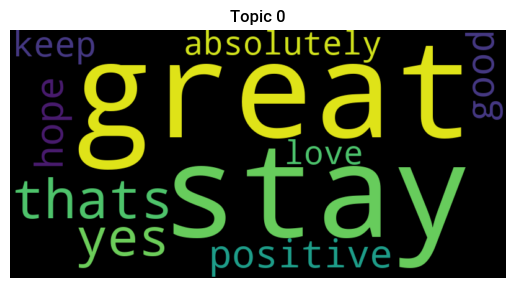

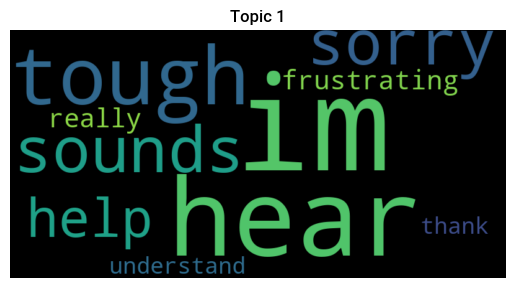

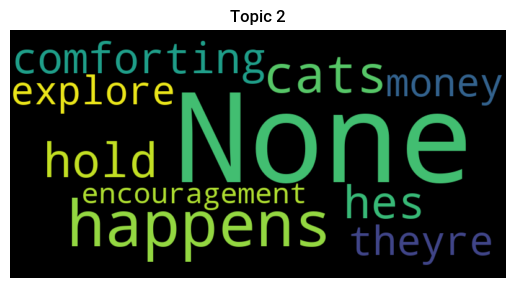

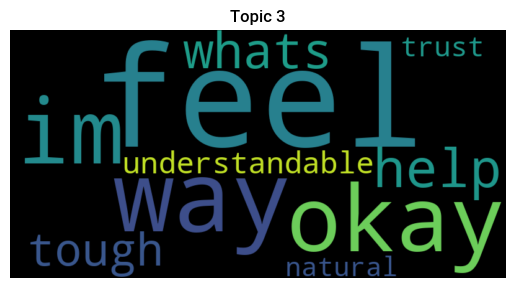

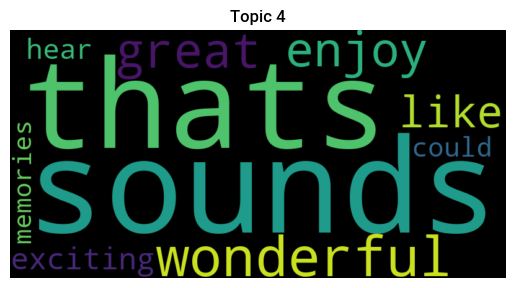

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, topic in lda_model_h.show_topics(num_topics=5, formatted=False):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

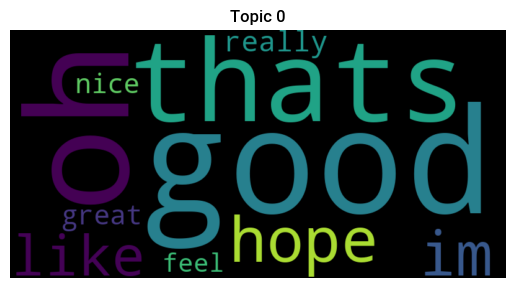

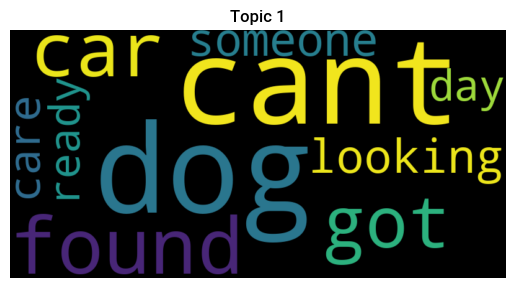

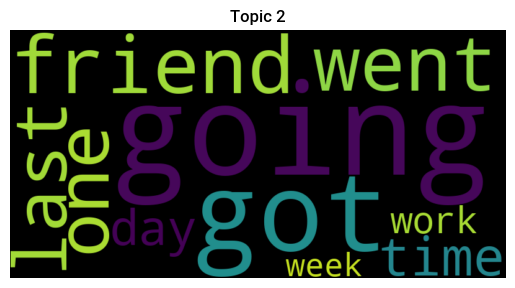

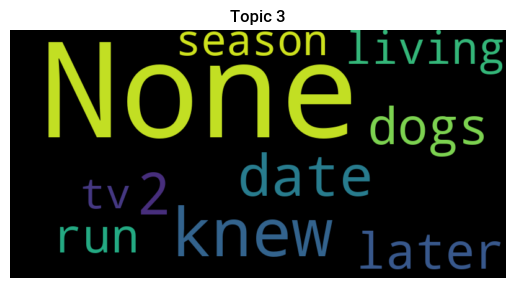

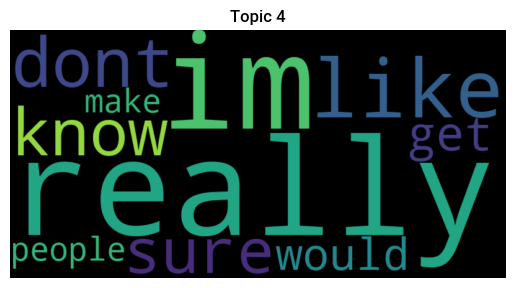

In [31]:
for idx, topic in lda_model_b.show_topics(num_topics=5, formatted=False):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

## Sentiment Analysis

using `distilbert-base-uncased-finetuned-sst-2-english` from hugging face

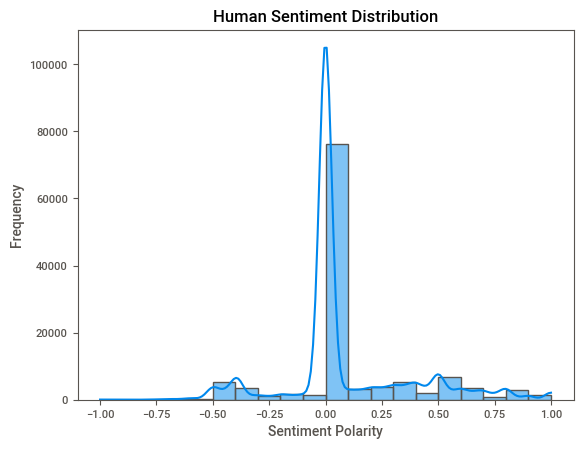

In [36]:
from textblob import TextBlob
import seaborn as sns

# Replace None or NaN with empty strings
df['cleaned_human_message'] = df['cleaned_human_message'].fillna('')

# Apply sentiment analysis
human_sentiment = df['cleaned_human_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
sns.histplot(human_sentiment, kde=True, bins=20)
plt.title('Human Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


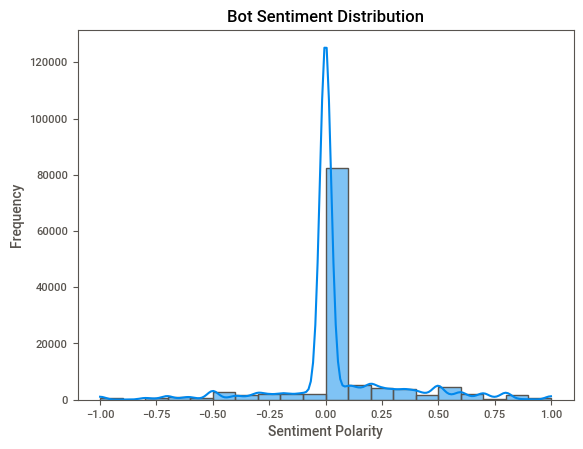

In [38]:

# Replace None or NaN with empty strings
df['cleaned_bot_message'] = df['cleaned_bot_message'].fillna('')

# Apply sentiment analysis
bot_sentiment = df['cleaned_bot_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
sns.histplot(bot_sentiment, kde=True, bins=20)
plt.title('Bot Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

+ -1.0: very negative emotion | e.g. this is terrible
+ 0.0: Neutral emotion | e.g. it's okay
+ 1.0: Very positive emotion | e.g. this is amazing

### Sentence similarity

In [42]:
df.head()

,speaker,message,len_bot,len_human,cleaned_message,cleaned_human_message,cleaned_bot_message
0,bot,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.",194.0,NaN,remember going see fireworks best friend first time ever spent time alone together although lot people felt like people world,,remember going see fireworks best friend first time ever spent time alone together although lot people felt like people world
1,human,That sounds magical! Fireworks create a special atmosphere.,NaN,59.0,sounds magical fireworks create special atmosphere,sounds magical fireworks create special atmosphere,
2,bot,This was a best friend. I miss her.,35.0,NaN,best friend miss,,best friend miss
3,human,I'm sorry to hear that. It's tough to lose someone close.,NaN,57.0,im sorry hear tough lose someone close,im sorry hear tough lose someone close,
4,bot,We no longer talk.,18.0,NaN,longer talk,,longer talk


In [40]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
label_embeddings = model.encode(df['labels'].tolist())
cosine_sim_matrix = cosine_similarity(label_embeddings)
similarity_df = pd.DataFrame(cosine_sim_matrix, columns=final_df['labels'], index=final_df['labels'])